In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sin, cos, sqrt, atan2, radians
import pymc3 as pm

In [161]:
# Import the data 
df = pd.read_csv("nyc-taxi-trip-duration/train.csv")

In [162]:
display(df.shape)
df.head()


(1458644, 11)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [163]:
def get_distance_between_points(lat1,lon1,lat2,lon2):
    '''
    This function is used to get the distance between lat1, lon1 and lat2, lon2
    '''
    # approximate radius of earth in km
    R = 6378.0
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

The coordinates of WALL STREET are 40.70729◦N, 74.01095◦W. 

In [5]:
df['dist_pickup_to_wall_street'] = np.vectorize(get_distance_between_points)(40.70729,-74.01095,df['pickup_latitude'], df['pickup_longitude'])

# Distance pickup to dropoff
df['dist_pickup_to_dropoff'] = np.vectorize(get_distance_between_points)(df['dropoff_latitude'],df['dropoff_longitude'],df['pickup_latitude'], df['pickup_longitude'])

In order to extract the most relevant information from the
dataset for our purpose, we create a filtered dataset, in
which either the pick-up or drop-off location lies within
500 m from Wall Street (indicated by the red oval in Fig.
3(b)). In addition, we filter trips with unrealistically long
durations (>20 000 s).

In [6]:
print("Number of rows taht satisfied the filter above : ",df[( df['dist_pickup_to_wall_street'] <= 0.5)& (df['trip_duration'] < 2000)].shape)



Number of rows taht satisfied the filter above :  (18748, 13)


In [7]:
df_wall = df[( df['dist_pickup_to_wall_street'] <= 0.5)& (df['trip_duration'] < 4000)]

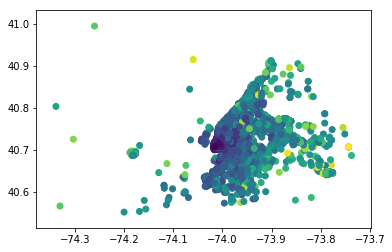

In [8]:
plt.scatter(df_wall['dropoff_longitude'], df_wall['dropoff_latitude'], c=df_wall['trip_duration'])

(array([ 161.,  269.,  428.,  646.,  705.,  903., 1063., 1182., 1227.,
        1331., 1271., 1218., 1198., 1039.,  938.,  834.,  781.,  660.,
         627.,  504.,  419.,  436.,  351.,  286.,  261.,  240.,  187.,
         141.,  149.,  117.,  113.,   91.,   85.,   81.,   62.,   54.,
          44.,   49.,   35.,   32.,   23.,   29.,   22.,   21.,   25.,
          17.,   19.,   13.,   14.,   16.]),
 array([2.00000e+00, 8.17400e+01, 1.61480e+02, 2.41220e+02, 3.20960e+02,
        4.00700e+02, 4.80440e+02, 5.60180e+02, 6.39920e+02, 7.19660e+02,
        7.99400e+02, 8.79140e+02, 9.58880e+02, 1.03862e+03, 1.11836e+03,
        1.19810e+03, 1.27784e+03, 1.35758e+03, 1.43732e+03, 1.51706e+03,
        1.59680e+03, 1.67654e+03, 1.75628e+03, 1.83602e+03, 1.91576e+03,
        1.99550e+03, 2.07524e+03, 2.15498e+03, 2.23472e+03, 2.31446e+03,
        2.39420e+03, 2.47394e+03, 2.55368e+03, 2.63342e+03, 2.71316e+03,
        2.79290e+03, 2.87264e+03, 2.95238e+03, 3.03212e+03, 3.11186e+03,
        3.19160e

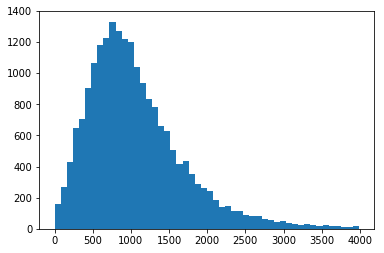

In [9]:
plt.hist(df_wall['trip_duration'],bins=50)

In [10]:
df_wall['trip_duration'].mean()

1063.9749718371945

In [11]:
df_wall['dropoff_datetime'].values[0]

'2016-05-10 19:44:40'

In [12]:
df_wall

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dist_pickup_to_wall_street,dist_pickup_to_dropoff
32,id3075902,2,2016-05-10 19:27:38,2016-05-10 19:44:40,2,-74.005501,40.706589,-73.985817,40.744202,N,1022,0.466408,4.504228
78,id1818021,1,2016-03-23 00:34:10,2016-03-23 00:45:24,1,-74.011169,40.703606,-74.005692,40.741360,N,674,0.410549,4.228005
113,id0694434,1,2016-01-26 23:40:14,2016-01-26 23:48:39,1,-74.006798,40.706074,-73.974022,40.744076,N,505,0.375631,5.053768
154,id0401226,1,2016-05-26 06:37:10,2016-05-26 06:52:19,4,-74.006706,40.705555,-73.991692,40.749722,N,909,0.406873,5.077028
510,id1638050,1,2016-04-11 23:27:02,2016-04-11 23:38:11,1,-74.009407,40.706123,-73.974632,40.751160,N,669,0.183897,5.808502
584,id0422722,2,2016-05-11 13:49:33,2016-05-11 14:12:31,6,-74.012810,40.708179,-73.984978,40.742088,N,1378,0.185557,4.445305
649,id0153673,2,2016-05-25 08:00:03,2016-05-25 08:10:07,6,-74.007858,40.705296,-74.013481,40.715263,N,604,0.342575,1.206770
814,id2587992,1,2016-06-15 18:34:54,2016-06-15 19:15:46,1,-74.009361,40.709076,-73.949783,40.772617,N,2452,0.239783,8.676426
822,id3602048,1,2016-01-02 09:05:44,2016-01-02 09:21:55,1,-74.007378,40.707905,-73.963364,40.775112,N,971,0.309122,8.351673
833,id0944696,2,2016-06-20 17:25:41,2016-06-20 17:34:40,5,-74.008408,40.707649,-74.005852,40.714710,N,539,0.218233,0.815059


# PyMC3 for Gaussian Process

In [13]:
# ls = [2, 5] # the lengthscales
# cov_func = pm.gp.cov.ExpQuad(input_dim=3, ls=ls, active_dims=[1, 2])

In [14]:
# gp = pm.gp.Latent(mean_func, cov_func)

In [15]:
# cov_func

In [16]:
# # A one dimensional column vector of inputs.
# X = np.linspace(0, 1, 10)[:, None]

# with pm.Model() as model:
#     # Specify the covariance function.
#     cov_func = pm.gp.cov.ExpQuad(1, ls=0.1)

#     # Specify the GP.  The default mean function is `Zero`.
#     gp = pm.gp.Latent(cov_func=cov_func)

#     # Place a GP prior over the function f.
#     f = gp.prior("f", X=X)



# # After fitting or sampling, specify the distribution
# # at new points with .conditional
# Xnew = np.linspace(-1, 2, 50)[:, None]

# with model:
#     fcond = gp.conditional("fcond", Xnew=Xnew)

In [ ]:
X

In [17]:
# plt.plot(X)
# plt.plot(Xnew)

In [18]:
# pm.model()

In [ ]:
len(list(df_wall['dropoff_latitude'][:10]))

In [ ]:
# plt.contour(df_wall['dropoff_latitude'], df_wall['dropoff_longitude'], df_wall['trip_duration'], colors='black');
def f(x, y):
    return x*y
x = list(df_wall['dropoff_longitude'][:30])
y = list(df_wall['dropoff_latitude'][:0])

X, Y = np.meshgrid([1]*30, list(df_wall['trip_duration'][:30]))
# X, Y = np.meshgrid(x,y)
Z = f(X, Y)

In [ ]:
Z

In [ ]:
plt.contourf( Z, 10);


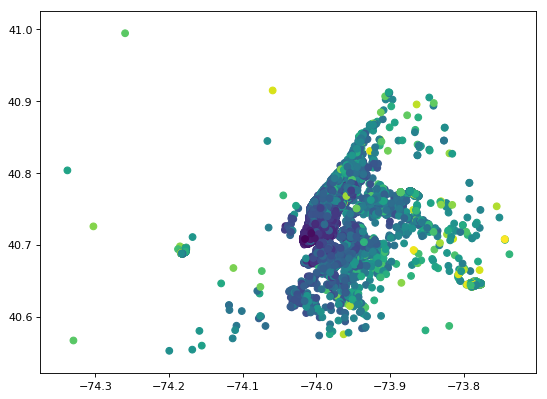

In [19]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(list(df_wall['dropoff_longitude']),list(df_wall['dropoff_latitude']), c=list(df_wall['trip_duration']))




In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go

{'whiskers': [<matplotlib.lines.Line2D at 0x1c2678add8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c267994a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c2678a9b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c26799b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c26799e80>],
 'means': []}

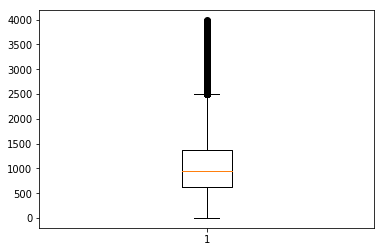

In [21]:
plt.boxplot(df_wall['trip_duration'])

In [22]:
# trace = go.Scatter(
#     x = df_wall['dropoff_longitude'],
#     y = df_wall['dropoff_latitude'],
#     mode='markers',
#     marker=dict(
#         size=3,
#         color = df_wall['dist_pickup_to_dropoff'],
#         colorscale='Jet',
#         showscale=True
#     )
# )
# data = [trace]
# py.iplot(data, filename='basic-scatter')

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [23]:
# trace = go.Scatter(
#     x = df_wall['dropoff_longitude'],
#     y = df_wall['dropoff_latitude'],
#     mode='markers',
#     marker=dict(
#         size=3,
#         color = df_wall['trip_duration'],
#         colorscale='Jet',
#         showscale=True
#     )
# )
# data = [trace]
# py.iplot(data, filename='basic-scatter')

In [24]:
corr = df_wall.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,dist_pickup_to_wall_street,dist_pickup_to_dropoff
vendor_id,1,0.27,0.0028,-0.029,0.0011,0.012,0.0051,0.007,0.013
passenger_count,0.27,1,-0.01,0.0044,-0.008,0.0025,0.0085,0.00038,-0.0028
pickup_longitude,0.0028,-0.01,1,-0.12,0.062,0.0097,-0.0063,0.043,0.0054
pickup_latitude,-0.029,0.0044,-0.12,1,-0.023,0.012,-0.029,-0.064,-0.039
dropoff_longitude,0.0011,-0.008,0.062,-0.023,1,0.14,0.49,0.0061,0.69
dropoff_latitude,0.012,0.0025,0.0097,0.012,0.14,1,0.26,0.0022,0.32
trip_duration,0.0051,0.0085,-0.0063,-0.029,0.49,0.26,1,-0.024,0.72
dist_pickup_to_wall_street,0.007,0.00038,0.043,-0.064,0.0061,0.0022,-0.024,1,0.0012
dist_pickup_to_dropoff,0.013,-0.0028,0.0054,-0.039,0.69,0.32,0.72,0.0012,1


In [25]:
df_wall['dropoff_time'] = df_wall['dropoff_datetime'].str.split(' ', expand=True)[1]

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [26]:
df_wall['dropoff_hour'] = df_wall['dropoff_time'].str.split(':', expand=True)[0]

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [27]:
df_wall['dropoff_hour'] = df_wall['dropoff_hour'].astype(str).astype(int)

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [28]:
# df_wall['trip_duration_category'] = np.vectorize(category_duration)(df_wall['trip_duration'])

NameError: name 'category_duration' is not defined

In [ ]:
# len(df_wall["trip_duration"])

In [ ]:
# # Data Preparation
# import torch.nn as nn
# import torch.utils.data
# trainSize = int(0.75 * len(df_wall))
# # testSize = len(df_wall) - trainSize
# target = df_wall["trip_duration"]
# # dropped = df_hist.drop("Sales", axis=1)
# dropped = df_wall[['dropoff_latitude','dropoff_longitude','dist_pickup_to_dropoff','dropoff_hour']]

# targets = torch.tensor(target.values).float()
# targets = targets.resize_((len(df_wall["trip_duration"]),1))
# inputs = torch.tensor(dropped.values).float()


# from torch.utils.data import TensorDataset, DataLoader
# # Define dataset
# train_ds = TensorDataset(inputs, targets)

# # Define Data Loader
# print("Train size :",trainSize)
# batch_size = trainSize
# train_dl = DataLoader(train_ds, batch_size, shuffle=True)
# series_dl = (next(iter(train_dl)))

# # # Convert torch to ndarray
# # x_train = series_dl[0].numpy()
# # y_train = series_dl[1].numpy()

# model = nn.Linear(dropped.shape[1], 1)
# print("Weight :" ,model.weight)
# print("Bias :" ,model.bias)

# # Define optimizer
# opt = torch.optim.SGD(model.parameters(), lr=1e-5)

# # Import nn.functional
# import torch.nn.functional as F



# # Define loss function
# loss_fn = F.mse_loss
# loss = loss_fn(model(inputs), targets)


# # Define a utility function to train the model
# def fit(num_epochs, model, loss_fn, opt):
#     for epoch in range(num_epochs):
#         for xb,yb in train_dl:
#             # Generate predictions
#             pred = model(xb)
            
#             # Calculate Loss
#             loss = loss_fn(pred, yb)
# #             print(loss)
#             # Perform gradient descent
#             loss.backward()
#             opt.step()
#             opt.zero_grad()
# #         print("Epoch [{}/{}], Loss: {:.4f}".format(epoch+1,num_epochs, loss))
#     print('Training loss: ', loss_fn(model(inputs), targets))
    
# # Train the model for 100 epochs
# print(fit(100, model, loss_fn, opt))

In [ ]:
# preds = model(inputs)

In [ ]:
# pred= preds.detach().numpy()

In [ ]:
# idx = []
# for i in range(len(pred)):
#     idx.append(pred[i][0])

In [ ]:
# df_wall['predicted_val']= idx

In [ ]:
# d = {'Truth' : df_wall['trip_duration'],
#      'Prediction' : df_wall['predicted_val']}
# df = pd.DataFrame(d)
# df.plot(style=['o','rx'])

In [ ]:
# plt.boxplot(df_wall['predicted_val'])

In [203]:
temp_df = df_wall[['dropoff_latitude','dropoff_longitude','dist_pickup_to_dropoff','trip_duration']]

In [204]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn import model_selection
from sklearn.model_selection import train_test_split
experiments = {"Algorithm":["Ordinary Least Squares", "Regression Tree", 
                            "Big Random Forest", "Random Forest", 
                            "Bagging"], 
               "Objects" : [lambda : LinearRegression(), 
                            lambda : DecisionTreeRegressor(), 
                            lambda : RandomForestRegressor(n_estimators=100), 
                            lambda : RandomForestRegressor(), 
                            lambda : BaggingRegressor()], 
               "Predictions":[[] for _ in range(5)]}
actuals = []

In [205]:
for _ in range (4):
    train_X, test_X, train_y, test_y = (
        train_test_split(temp_df.drop("trip_duration", axis=1), 
                         temp_df["trip_duration"], test_size=0.33))
    for i, obj_factory in enumerate(experiments["Objects"]):
        obj = obj_factory()
        obj.fit(y=train_y,X=train_X)
        experiments["Predictions"][i] += list(obj.predict(test_X))
    actuals += list(test_y)
actuals = pd.Series(actuals)
experiments["Predictions"] = list(map(pd.Series, experiments["Predictions"]))

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



In [206]:
experiments["Results"] = []
for o in experiments["Objects"]:
    experiments["Results"].append(
        model_selection.cross_val_score(o(), y=temp_df['trip_duration'], 
                                        X=temp_df.drop("trip_duration", axis=1),
                                        cv=5).mean())

pd.DataFrame(experiments).drop(["Objects", "Predictions"], 
                            axis=1).set_index("Algorithm")

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/Users/lilianaester/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,Results
Algorithm,
Ordinary Least Squares,0.520687
Regression Tree,0.206279
Big Random Forest,0.559954
Random Forest,0.524186
Bagging,0.527228


# Big Random Forest

In [199]:
def create_model(temp_df, wall_street_location):
    train_X, test_X, train_y, test_y = ( train_test_split(temp_df.drop("trip_duration", axis=1), 
                             temp_df["trip_duration"], test_size=0.33))

    obj = RandomForestRegressor(n_estimators=100)
    obj.fit(y=train_y,X=train_X)
    obj.predict(test_X)
    
    print("Cross val score : ",model_selection.cross_val_score(obj, y=temp_df['trip_duration'], 
                                            X=temp_df.drop("trip_duration", axis=1),
                                            cv=5).mean())
    obj.predict(temp_df.drop("trip_duration", axis=1))
#     return obj.predict(temp_df.drop("trip_duration", axis=1))

    ## CREATE THE SAMPLE FOR THE MODEL
    sample_lat = []
    for i in range(40):
        sample_lat.append(i*0.01 + 40.5)

    sample_lng = []
    for i in range(60):
        sample_lng.append(i*0.01 -74.3)
        
    temp2_list = []
    tempi_list = []
    tempj_list = []
    tempdist_list = []
    for i in sample_lat:
        temp1_list = []
        for j in sample_lng:
            tempi_list.append(i)
            tempj_list.append(j)
            tempdist_list.append(get_distance_between_points(wall_street_location[0],wall_street_location[1],i,j))

    d = {'dropoff_latitude' : tempi_list,
     'dropoff_longitude' : tempj_list,
    'dist_pickup_to_dropoff': tempdist_list}
    temp_pred_df = pd.DataFrame(d)  
    
    temp_pred_df['predicted_dist'] = obj.predict(temp_pred_df)
    return temp_pred_df

In [142]:
wall_street_location = [40.70729,-74.01095]

xdf = create_model(temp_df,wall_street_location)
    

NameError: name 'create_model' is not defined

In [229]:
def draw_contour_matplotlib(temp_pred_df):
    temp_predicted_list = []
    for i in temp_pred_df['dropoff_latitude'].unique():
        temp_predicted_list.append(list(temp_pred_df.loc[temp_pred_df['dropoff_latitude'] == i]['predicted_dist']))

    x = np.arange(1, 10)
#     print(x.shape)
    y = x.reshape(-1, 1)
#     print(y)
    # h =[[ 1,  2,  3,  4,  5,  6,  7,  8  ,9],
    #  [ 20,  400 , 6  ,8, 10, 12, 14, 16, 18],
    #  [ 3,  6  ,9 ,12 ,15 ,18 ,21 ,24 ,27],
    #  [ 4,  8 ,12 ,16 ,20 ,24 ,28 ,32 ,36],
    #  [ 5, 10 ,15 ,20 ,25 ,30 ,35 ,40 ,45],
    #  [ 6, 12 ,18 ,24 ,30 ,36 ,42 ,48 ,54],
    #  [ 7, 14 ,21 ,28 ,35 ,42 ,49 ,56 ,63],
    #  [ 8 ,16 ,24, 32 ,40 ,48 ,56 ,64 ,72],
    #  [ 9 ,18, 27, 36 ,45, 54, 63, 72, 81]]
    # print(h)
    h1 = temp_predicted_list

    xRange = np.arange(73.7, 74.3, 0.01)
#     print(xRange.shape)
    yRange = np.arange(40.5,40.9, 0.01)
#     print(yRange.shape)
    cs = plt.contourf(xRange,yRange, h1, colors=['#4363d8',
    '#42d4f4',
    '#3cb44b',
    '#bfef45',
    '#ffe119',
    '#f58231',
    '#e6194B'])

    cs.changed()
    
def draw_contour_plotly(temp_pred_df):
    trace = go.Scatter(
        x = temp_pred_df['dropoff_longitude'],
        y = temp_pred_df['dropoff_latitude'],
        mode='markers',
        marker=dict(
            size=7,
            color = temp_pred_df['predicted_dist'],
            colorscale='Jet',
            showscale=True
        )
    )
    data = [trace]
    return py.iplot(data, filename='basic-scatter')
    

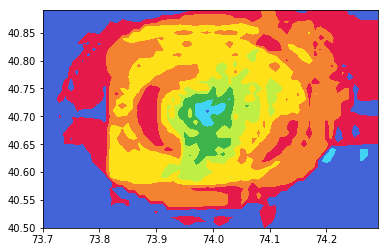

In [234]:
draw_contour_matplotlib(xdf)
draw_contour_plotly(xdf)

In [231]:
import random
def get_random(temp_df):
    random_places = set()
    while len(random_places) != 6 :
        temp_number = random.randint(1,len(temp_df))
        random_places.add(temp_number)
    return random_places
        

In [232]:
random_index = get_random(temp_df[['dropoff_latitude','dropoff_longitude']])

In [252]:
temp_df.iloc[14841]['dropoff_latitude']

40.72472763061523

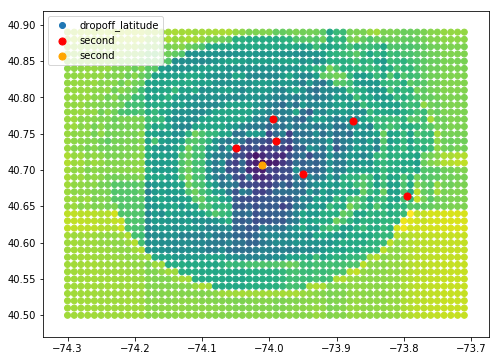

In [300]:
sample_location = [[40.73,-74.05],[40.665,-73.795],[40.77,-73.995],[40.74,-73.99],[40.695,-73.95],[40.767,-73.875]]
# WALL STREET
x,y = zip(*sample_location)
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(xdf['dropoff_longitude'], xdf['dropoff_latitude'], c=xdf['predicted_dist'],label = 'prediction')
ax1.scatter(y,x, s=50, c='r', marker="o", label='second')
ax1.scatter(wall_street_location[1],wall_street_location[0], s=50, c='orange', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()



Cross val score :  0.5591476737562466


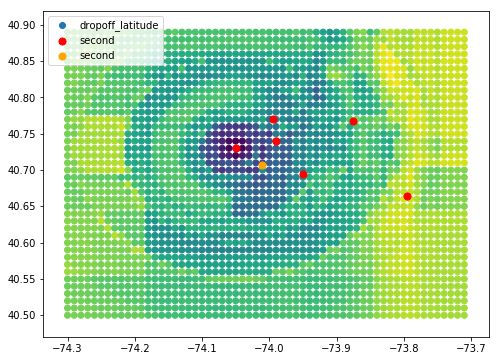

In [304]:
# LOCATION 1
list_random_index = list(random_index)
zdf = create_model(temp_df,sample_location[0])
# draw_contour_matplotlib(zdf)
# draw_contour_plotly(xdf)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(zdf['dropoff_longitude'], zdf['dropoff_latitude'], c=zdf['predicted_dist'],label = 'prediction')
ax1.scatter(y,x, s=50, c='r', marker="o", label='second')
ax1.scatter(wall_street_location[1],wall_street_location[0], s=50, c='orange', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()



Cross val score :  0.5590481069595743


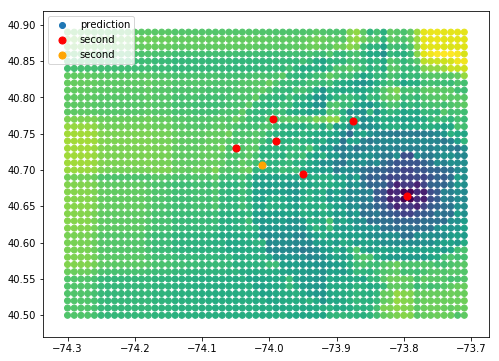

In [306]:
# LOCATION 2
list_random_index = list(random_index)
zdf = create_model(temp_df,sample_location[1])
# draw_contour_matplotlib(zdf)
# draw_contour_plotly(xdf)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(zdf['dropoff_longitude'], zdf['dropoff_latitude'], c=zdf['predicted_dist'], label = 'prediction')
ax1.scatter(y,x, s=50, c='r', marker="o", label='second')
ax1.scatter(wall_street_location[1],wall_street_location[0], s=50, c='orange', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()



Cross val score :  0.5592863711155662


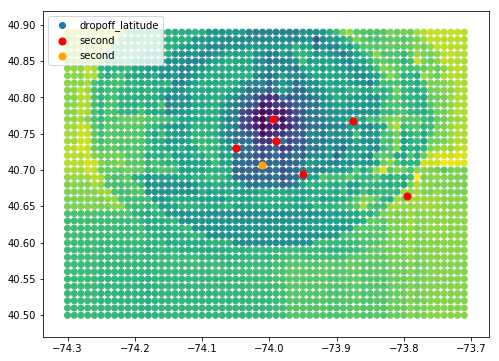

In [303]:
# LOCATION 3
list_random_index = list(random_index)
zdf = create_model(temp_df,sample_location[2])
# draw_contour_matplotlib(zdf)
# draw_contour_plotly(xdf)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax1.scatter(zdf['dropoff_longitude'], zdf['dropoff_latitude'], c=zdf['predicted_dist'],label = 'prediction')
ax1.scatter(y,x, s=50, c='r', marker="o", label='second')
ax1.scatter(wall_street_location[1],wall_street_location[0], s=50, c='orange', marker="o", label='second')
plt.legend(loc='upper left');
plt.show()



In [307]:
zdf

,dropoff_latitude,dropoff_longitude,dist_pickup_to_dropoff,predicted_dist
0,40.50,-74.30,46.476902,2442.05
1,40.50,-74.29,45.701526,2442.05
2,40.50,-74.28,44.928676,2442.05
3,40.50,-74.27,44.158486,2442.05
4,40.50,-74.26,43.391097,2382.77
5,40.50,-74.25,42.626659,2283.88
6,40.50,-74.24,41.865336,2260.62
7,40.50,-74.23,41.107300,2260.62
8,40.50,-74.22,40.352735,2260.62
9,40.50,-74.21,39.601842,2260.62


In [151]:
sample_location = [[wall_street_location[0],wall_street_location[1]],[40.73,-74.05],[40.665,-73.795],[40.77,-73.995],[40.74,-73.99],[40.695,-73.95],[40.767,-73.875]]
list_random_index = list(sample_location)

def create_model_for_minizinc(temp_df,wall_street_location):
    train_X, test_X, train_y, test_y = ( train_test_split(temp_df.drop("trip_duration", axis=1), 
                             temp_df["trip_duration"], test_size=0.33))

    obj = RandomForestRegressor(n_estimators=100)
    obj.fit(y=train_y,X=train_X)
    obj.predict(test_X)
    
    print("Cross val score : ",model_selection.cross_val_score(obj, y=temp_df['trip_duration'], 
                                            X=temp_df.drop("trip_duration", axis=1),
                                            cv=5).mean())
    obj.predict(temp_df.drop("trip_duration", axis=1))
#     return obj.predict(temp_df.drop("trip_duration", axis=1))

    ## CREATE THE SAMPLE FOR THE MODEL
    sample_lat = []
    for i in range(len(list_random_index)):
        sample_lat.append(sample_location[i][0])

    sample_lng = []
    for i in range(len(list_random_index)):
        sample_lng.append(sample_location[i][1])
        
    temp2_list = []
    tempi_list = []
    tempj_list = []
    tempdist_list = []
    for i in sample_lat:
        temp1_list = []
        for j in sample_lng:
            tempi_list.append(i)
            tempj_list.append(j)
            tempdist_list.append(get_distance_between_points(wall_street_location[0],wall_street_location[1],i,j))

    d = {'dropoff_latitude' : tempi_list,
     'dropoff_longitude' : tempj_list,
    'dist_pickup_to_dropoff': tempdist_list}
    temp_pred_df = pd.DataFrame(d)  
    
    temp_pred_df['predicted_dist'] = obj.predict(temp_pred_df)
    return temp_pred_df

In [152]:
at_model_df = create_model_for_minizinc(temp_df,wall_street_location)


NameError: name 'temp_df' is not defined

In [153]:
at_model_df[['dropoff_latitude','dropoff_longitude','dist_pickup_to_dropoff']].pivot(index= ['dropoff_latitude','dropoff_longitude'] ,columns = 'dist_pickup_to_dropoff')


NameError: name 'at_model_df' is not defined

In [154]:
at_model_df[['dropoff_latitude','dropoff_longitude','dist_pickup_to_dropoff']].groupby(by=['dropoff_latitude','dropoff_longitude'])



NameError: name 'at_model_df' is not defined

In [155]:
list(at_model_df[['dropoff_latitude','dropoff_longitude']])

NameError: name 'at_model_df' is not defined

In [156]:
loc_lat_set = set(at_model_df['dropoff_latitude'])

NameError: name 'at_model_df' is not defined

In [356]:
loc_lat_set

{40.665, 40.695, 40.70729, 40.73, 40.74, 40.767, 40.77}

In [352]:
at_model_df.groupby(['dropoff_latitude','dropoff_longitude']).dist_pickup_to_dropoff.transform(max)

0      0.000000
1      3.295198
2     18.222737
3      1.345926
4      1.767846
5      5.143210
6     11.472014
7      2.528011
8      4.152766
9     18.394177
10     2.863868
11     3.084649
12     5.730133
13    11.745342
14     4.707600
15     5.746888
16    18.826589
17     4.896342
18     5.028794
19     6.973586
20    12.403716
21     6.980695
22     7.718692
23    19.506036
24     7.109143
25     7.200864
26     8.669359
27    13.424352
28     3.641182
29     4.910316
30    18.578569
31     3.881860
32     4.047463
33     6.300620
34    12.033315
35     1.368087
36     3.568192
37    18.275697
38     1.919248
39     2.235513
40     5.322513
41    11.554353
42     6.646744
43     7.418072
44    19.389417
45     6.781526
46     6.877622
47     8.402862
48    13.253991
Name: dist_pickup_to_dropoff, dtype: float64

In [357]:
at_model_df

,dropoff_latitude,dropoff_longitude,dist_pickup_to_dropoff,predicted_dist
0,40.70729,-74.01095,0.000000,562.23
1,40.70729,-74.05000,3.295198,935.16
2,40.70729,-73.79500,18.222737,2518.39
3,40.70729,-73.99500,1.345926,469.61
4,40.70729,-73.99000,1.767846,430.67
5,40.70729,-73.95000,5.143210,1195.25
6,40.70729,-73.87500,11.472014,1767.13
7,40.73000,-74.01095,2.528011,766.70
8,40.73000,-74.05000,4.152766,1043.58
9,40.73000,-73.79500,18.394177,2293.04


In [157]:
sample_location

[[40.70729, -74.01095],
 [40.73, -74.05],
 [40.665, -73.795],
 [40.77, -73.995],
 [40.74, -73.99],
 [40.695, -73.95],
 [40.767, -73.875]]

In [158]:
wall_street_location

[40.70729, -74.01095]

In [166]:
all_location = []
for i in sample_location:
    temp_list_dist = []
    for j in sample_location:
        temp_list_dist.append(round(get_distance_between_points(i[0],i[1],j[0],j[1]),2))
        all_location.append(round(get_distance_between_points(i[0],i[1],j[0],j[1]),2))
    print(temp_list_dist)
        

[0.0, 4.15, 18.83, 7.11, 4.05, 5.32, 13.25]
[4.15, 0.0, 22.7, 6.43, 5.18, 9.29, 15.32]
[18.83, 22.7, 0.0, 20.53, 18.45, 13.5, 13.21]
[7.11, 6.43, 20.53, 0.0, 3.37, 9.17, 10.12]
[4.05, 5.18, 18.45, 3.37, 0.0, 6.04, 10.15]
[5.32, 9.29, 13.5, 9.17, 6.04, 0.0, 10.21]
[13.25, 15.32, 13.21, 10.12, 10.15, 10.21, 0.0]


In [172]:
import statistics
statistics.mean(all_location)

9.24

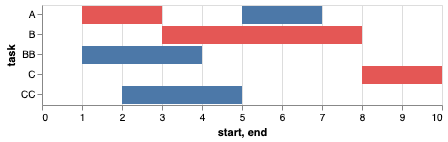

In [246]:
import altair as alt
import pandas as pd

source = pd.DataFrame([
    {"task": "A", "start": 1, "end": 3},
    {"task": "B", "start": 3, "end": 8},
    {"task": "C", "start": 8, "end": 10}
])

source1 = pd.DataFrame([
    {"task": "A", "start": 5, "end": 7},
    {"task": "BB", "start": 1, "end": 4},
    {"task": "CC", "start": 2, "end": 5}
])
bar1 = alt.Chart(source).mark_bar(color="#e45755").encode(
    x='start',
    x2='end',
    y='task'
)

bar2 = alt.Chart(source1).mark_bar().encode(
    x='start',
    x2='end',
    y='task'
)
a = bar2+bar1
a

In [360]:
# successor = [4, 5, 6, 19, 3, 25, 1, 20, 21, 22, 23, 24, 2, 26, 27, 28, 29, 30, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 7];
# routeOf = [1, 7, 7, 1, 7, 7, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
# time = [69971, 89805, 144605, 71771, 91605, 146405, 0, 141742, 141742, 141742, 141742, 0, 0, 267970, 267970, 267970, 267970, 0, 141742, 141742, 141742, 141742, 0, 0, 267970, 267970, 267970, 267970, 0, 0]

successor = [4, 25, 5, 19, 26, 27, 1, 20, 21, 22, 23, 24, 2, 3, 6, 28, 29, 30, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 7];
routeOf = [1, 7, 8, 1, 8, 9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12];
time = [53814, 21095, 74096, 123814, 127096, 180097, 0, 177628, 177628, 177628, 177628, 0, 0, 42190, 148191, 212003, 212003, 0, 177628, 177628, 177628, 177628, 0, 0, 42190, 148191, 212003, 212003, 0, 0];

surveyStart = [53814, 21095, 74096];

In [217]:
successor[7-1]

1

In [440]:
n = 3
list_taxi1 = []
print(" ============ TAXI 1 =============")
taxi = "taxi1"
start_point = 2*n + 1
for i in range(len(successor)): 
    temp_start = start_point
    start_point = successor[start_point-1]
    # State and taxi
    start_node = temp_start
    end_node = successor[temp_start-1]
#     if start_node > 2*n and start_node <= 6*n:
#         if start_node <= 4*n :
#             taxi = "taxi1"
#         else :
#             taxi = "taxi2"
#         if end_node >= 1 and end_node <= n :
#             state= "DO"
#         if end_node > 6*n and end_node <= 10*n :
#             state = "HQ"
    if (end_node > 2*n ):
        state = "HQ"
        
    elif end_node <= 2*n :
        if int(start_node) != int(end_node - n):
            if end_node > n:
                place = end_node - n
            else :
                place = end_node
        if place == start_node:
            place = 0
        state = "go to Place " + str(place)
        
    else : 
        state = "    "
    
    
    
    
    list_taxi1.append([taxi, state,start_node,end_node,time[temp_start-1],time[start_point-1]])
#     print("{} {} From:{} to {}      | start_time : {} - {}".format(taxi,state,temp_start,successor[temp_start-1],time[temp_start-1],time[start_point-1]))
    temp_start = start_point
    if i == 4*n+1 :
        taxi = "taxi2"
        print(" ============ TAXI 2 =============")
        
result_taxi_df = pd.DataFrame(list_taxi1)
result_taxi_df.columns = ["taxi","state","start_node","end_node","start","end"]
# result_taxi_df

 ============ TAXI 1 =============
 ============ TAXI 2 =============


In [441]:
ress_df = result_taxi_df.loc[(result_taxi_df.start != result_taxi_df.end) & (result_taxi_df.end != 0 )]
ress_df

,taxi,state,start_node,end_node,start,end
0,taxi1,go to Place 1,7,1,0,53814
1,taxi1,go to Place 0,1,4,53814,123814
2,taxi1,HQ,4,19,123814,177628
14,taxi2,go to Place 2,13,2,0,21095
15,taxi2,HQ,2,25,21095,42190
17,taxi2,go to Place 3,14,3,42190,74096
18,taxi2,go to Place 2,3,5,74096,127096
19,taxi2,HQ,5,26,127096,148191
21,taxi2,go to Place 3,15,6,148191,180097
22,taxi2,HQ,6,27,180097,212003


In [448]:
survey_time = 70000

survey2_start_end = []
for idx,i in enumerate(surveyStart):
    survey2_start_end.append(["taxi" + str(idx+1) + " survey" + str(idx+1),i,i+survey_time])
    

survey2_df = pd.DataFrame(survey2_start_end)
survey2_df.columns = ["taxi","start","end"]

In [449]:
survey2_df

,taxi,start,end
0,taxi1 survey1,53814,123814
1,taxi2 survey2,21095,91095
2,taxi3 survey3,74096,144096


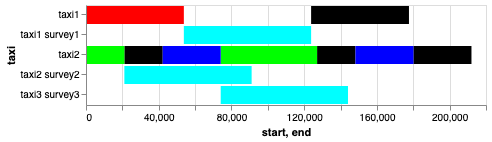

In [450]:
import altair as alt
import pandas as pd

color = ['#000000','#FF0000','#00FF00','#0000FF','#FFFF00','#00FFFF','#FF00FF','#C0C0C0','#808080','#800000','#808000','#008000','#800080','#008080','#000080']


backHQ = alt.Chart(ress_df[(ress_df.state == "HQ") ]).mark_bar(color=color[0]).encode(x='start',x2='end',y='taxi')

goto1 = alt.Chart(ress_df[(ress_df['state'].str[-1] == "1") ]).mark_bar(color=color[1]).encode(x='start',x2='end',y='taxi')
goto2 = alt.Chart(ress_df[(ress_df['state'].str[-1] == "2") ]).mark_bar(color=color[2]).encode(x='start',x2='end',y='taxi')
goto3 = alt.Chart(ress_df[(ress_df['state'].str[-1] == "3") ]).mark_bar(color=color[3]).encode(x='start',x2='end',y='taxi')


ts2 = alt.Chart(survey2_df).mark_bar(color=color[5]).encode(x='start',x2='end',y='taxi')

backHQ + goto1 + goto2 + goto3 + ts2




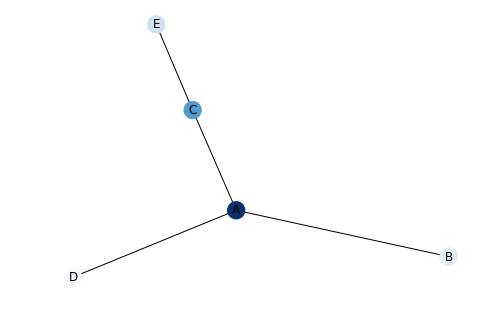

In [136]:
# libraries
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
 
# Build a dataframe with your connections
df = pd.DataFrame({ 'from':['A', 'B', 'C','A'], 'to':['D', 'A', 'E','C']})
 
# And a data frame with characteristics for your nodes
carac = pd.DataFrame({ 'ID':['A', 'B', 'C','D','E'], 'myvalue':[123,25,76,12,34] })
 
# Build your graph
G=nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.Graph() )
 
# The order of the node for networkX is the following order:
G.nodes()
# Thus, we cannot give directly the 'myvalue' column to netowrkX, we need to arrange the order!
 
# Here is the tricky part: I need to reorder carac, to assign the good color to each node
carac= carac.set_index('ID')
carac=carac.reindex(G.nodes())
 
# Plot it, providing a continuous color scale with cmap:
nx.draw(G, with_labels=True, node_color=carac['myvalue'], cmap=plt.cm.Blues)
